In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.image import imread 
import math as m

In [4]:
image = imread('pisa_rotate.png')
# plt.imshow(image)
h,w = image.shape[:2]
h,w
# plt.imshow(image)
h_mid, w_mid = (h//2,w//2)
w_mid

103

In [8]:
# trial with matrix

theta = 4
cos = np.cos(theta)
sin = np.sin(theta)
# target_mat = np.zeros_like(image)
target = np.zeros_like(image)

# image_mat = np.array([i , j , 1])
# source_mat = image_mat.reshape((3,1))
rotation_mat = np.array([[cos , sin , 0],
                        [-sin , cos , 0],
                        [1 , 0 , 0]])

for i in range(h):
    for j in range(w):
      image_mat = np.array([i - h_mid , j - w_mid , 1])
      source_mat = image_mat.reshape((3,1))
      target_mat = np.matmul(rotation_mat , source_mat)


target_mat
# rotation_mat
# rounded_rotation_mat = np.round(rotation_mat, decimals=3)

# print(rounded_rotation_mat)

array([[-470.30389567],
       [ 229.37141435],
       [ 481.        ]])

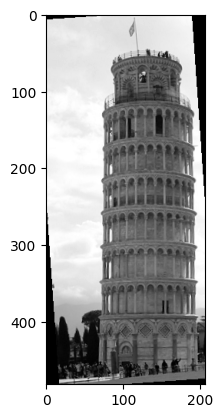

In [5]:
#  THIS IS MY WORKING CODE 
'''  https://shrishailsgajbhar.github.io/post/Image-Processing-Image-Rotation-Without-Library-Functions
'''

theta = -4
# cos = np.cos(theta)
# sin = np.sin(theta)
cos = np.cos(np.radians(theta))
sin = np.sin(np.radians(theta))
# target_mat = np.zeros_like(image)
target = np.zeros_like(image)

# image_mat = np.array([i , j , 1])
# source_mat = image_mat.reshape((3,1))
rotation_mat = np.array([[cos , sin , 0],
                        [-sin , cos , 0],
                        [0 , 0 , 1 ]])
inv_mat = np.linalg.inv(rotation_mat)
for i in range(h):
    for j in range(w):
      image_mat = np.array([i - h_mid , j - w_mid , 1])
      source_mat = image_mat.reshape((3,1))
      target_mat = np.matmul(inv_mat , source_mat)
      x = target_mat[0,0] + h_mid
      y = target_mat[1 , 0] + w_mid
      x_ = m.floor(x)
      y_ = m.floor(y)
      a = x - x_
      b = y - y_
      # x, x_ , y , y_ , a , b
      
      # if (x_ <0 or x_ >=h - 1) and (y_ <0 or y_ > w - 1):
      #       target[i,j] = 0
      #     # print(".")
      # #     print(x_ , y_)

      
      # else:
            
      #       It_1 = (1 - a) * (1 - b) * image[x_, y_]
      #       It_2 = (1 - a) * b * image[x_, y_ + 1]
      #       It_3 = a * b * image[x_ + 1, y_ + 1]
      #       It_4= a * (1 - b) * image[x_ + 1, y_]

      #       target[i,j] = It_1 + It_2 + It_3 + It_4
      #     # print(x_ , y_)
            
      if 0 <= x_ < h - 1 and 0 <= y_ < w - 1:
          It_1 = (1 - a) * (1 - b) * image[x_, y_]
          It_2 = (1 - a) * b * image[x_, y_ + 1]
          It_3 = a * b * image[x_ + 1, y_ + 1]
          It_4= a * (1 - b) * image[x_ + 1, y_]
        #   print("if")

          target[i,j] = It_1 + It_2 + It_3 + It_4
      else:
        #   print("going into else")
          target[i,j] = 0

plt.imshow(target , cmap = 'gray')